# Predefined Functions

In [1]:
def step_gradient(X,Y, learning_rate, m, c):
    m_check = [0.0 for i in range(13)]
    m_slope = np.array(m_check)
    c_slope = 0
    
    M = len(X)
    
    for i in range(M):
        half_sum = 0
        for j in range(len(m)):
            half_sum+= m[j] * X[i][j]
            
        half_sum+= c
        
        for j in range(len(m)):
            m_slope[j] += (-2/M)*(Y[i][0]-half_sum)*X[i][j]
        
        c_slope += (-2/M)*(Y[i][0]-half_sum)
        
        m -= learning_rate * m_slope
        c -= learning_rate * c_slope
    return m, c
    

In [2]:
def cost(X, Y, m , c):
    total_cost = 0
    M = len(X)
    for i in range(M):
        half_sum = 0
        for j in range(len(m)):
            half_sum+= m[j]*X[i][j]
        half_sum+=c
        
        total_cost += (1/M)*((Y[i][0]-half_sum)**2)
    return total_cost

In [3]:
def gd(X, Y, learning_rate, num_iterations):
    m_array = [0.0 for i in range(13)]
    m = np.array(m_array)
    c = 0
    
    for i in range(num_iterations):
        m,c = step_gradient(X,Y,learning_rate, m,c)
        print(i, "Cost = ", cost(X,Y,m,c))
        
    return m,c

In [4]:
def run(X_train, Y_train, learning_rate, num_iterations):
    m,c = gd(X_train,Y_train, learning_rate, num_iterations)
    print(m,c)
    return m,c

In [5]:
def score(Y_pred, Y_ori):
    Y_new = (Y_ori - Y_pred)**2
    u = Y_new.sum()

    M = len(Y_ori)
    sum1 = Y_ori.sum()
    
    mean1 = sum1/M
    
    Y_new2 = (Y_ori - mean1)**2
    v = Y_new2.sum()
    
    return (1 - (u/v))
    

In [6]:
def predict(X_test, m , c):
    predictions = []

    for i in range(len(X_test)):
        pred = 0
        for j in range(len(m)):
            pred += m[j]*X_test[i][j]
        pred+=c
    
        predictions.append([pred])
    
    Y_pred = np.array(predictions)
    
    return Y_pred


# Original Code

In [7]:
import numpy as np

In [8]:
data = np.loadtxt("train.csv", delimiter = ",")
data.shape

(379, 14)

In [9]:
X = data[:, :13]
X.shape

(379, 13)

In [10]:
Y = data[:, 13:14]
Y.shape

(379, 1)

In [27]:
#Min Max Feature Scaling

for i in range(13):
    mini = X[:,i].min()
    maxi = X[:,i].max()
    difference = maxi- mini
    for j in range(len(X)):
        a = (X[j][i]-mini)/difference
        X[j][i] = a
        
X.shape

(379, 13)

In [29]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)

In [31]:
m,c = run(X_train, Y_train, 0.01, 300)

0 Cost =  58.960435898755904
1 Cost =  49.98672585967965
2 Cost =  45.621626358854094
3 Cost =  42.23504626405355
4 Cost =  39.60637118057128
5 Cost =  37.532295990968
6 Cost =  35.866094731868046
7 Cost =  34.50551598758327
8 Cost =  33.37846181632387
9 Cost =  32.4331554659045
10 Cost =  31.631694270629005
11 Cost =  30.94580412603712
12 Cost =  30.354010522300023
13 Cost =  29.83972727423612
14 Cost =  29.3899457219046
15 Cost =  28.994321302057426
16 Cost =  28.64452638882316
17 Cost =  28.333784001230928
18 Cost =  28.05652617766131
19 Cost =  27.808139615725807
20 Cost =  27.58477337598395
21 Cost =  27.38319143785701
22 Cost =  27.200658182446
23 Cost =  27.034848414418718
24 Cost =  26.883775931979002
25 Cost =  26.745736299954018
26 Cost =  26.61926062767663
27 Cost =  26.503077963959996
28 Cost =  26.396084503122992
29 Cost =  26.297318219553734
30 Cost =  26.20593786104495
31 Cost =  26.121205465154155
32 Cost =  26.042471740086008
33 Cost =  25.969163787330075
34 Cost =  25

273 Cost =  24.466588964391622
274 Cost =  24.46679915010604
275 Cost =  24.46700907672958
276 Cost =  24.46721870686753
277 Cost =  24.467428004336266
278 Cost =  24.467636934132862
279 Cost =  24.467845462407073
280 Cost =  24.468053556432718
281 Cost =  24.468261184580147
282 Cost =  24.46846831628934
283 Cost =  24.468674922043547
284 Cost =  24.468880973343662
285 Cost =  24.469086442683356
286 Cost =  24.46929130352332
287 Cost =  24.469495530268752
288 Cost =  24.46969909824466
289 Cost =  24.469901983673388
290 Cost =  24.47010416365237
291 Cost =  24.47030561613175
292 Cost =  24.470506319893094
293 Cost =  24.470706254528455
294 Cost =  24.470905400419905
295 Cost =  24.471103738719318
296 Cost =  24.4713012513292
297 Cost =  24.4714979208831
298 Cost =  24.471693730727058
299 Cost =  24.47188866490143
[ -9.28531611   3.67490367   0.14002424   4.48240608  -8.93007404
  16.2535578   -1.9725798  -16.05540855   7.21251679  -6.36997896
 -10.55966872   1.64890511 -19.58751733] 32.

In [32]:
Y_pred = predict(X_test, m, c)

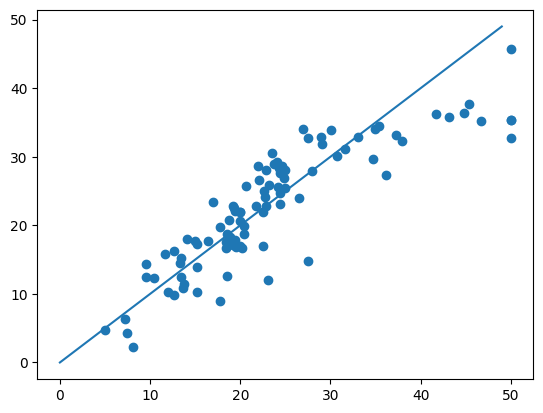

In [33]:
import matplotlib.pyplot as plt

one = np.arange(0,50, 1)
plt.plot(one,one)
plt.scatter(Y_test, Y_pred)
plt.show()

In [34]:
score(Y_pred, Y_test)

0.7566546310923543

In [35]:
Y_pred2 = predict(X_train, m, c)

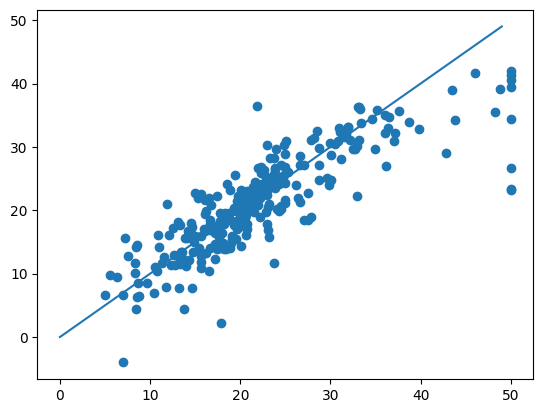

In [36]:
import matplotlib.pyplot as plt

one = np.arange(0,50, 1)
plt.plot(one,one)
plt.scatter(Y_train, Y_pred2)
plt.show()

In [37]:
score(Y_pred2, Y_train)

0.7020445277785466